In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input,AveragePooling2D,BatchNormalization

In [31]:
from tensorflow.keras.datasets import cifar10

In [32]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [33]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [34]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

[2]


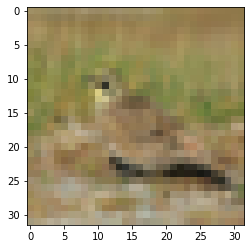

In [35]:
i = np.random.randint(0,49999)
print(y_train[i])
plt.imshow(X_train[i],cmap="gray");

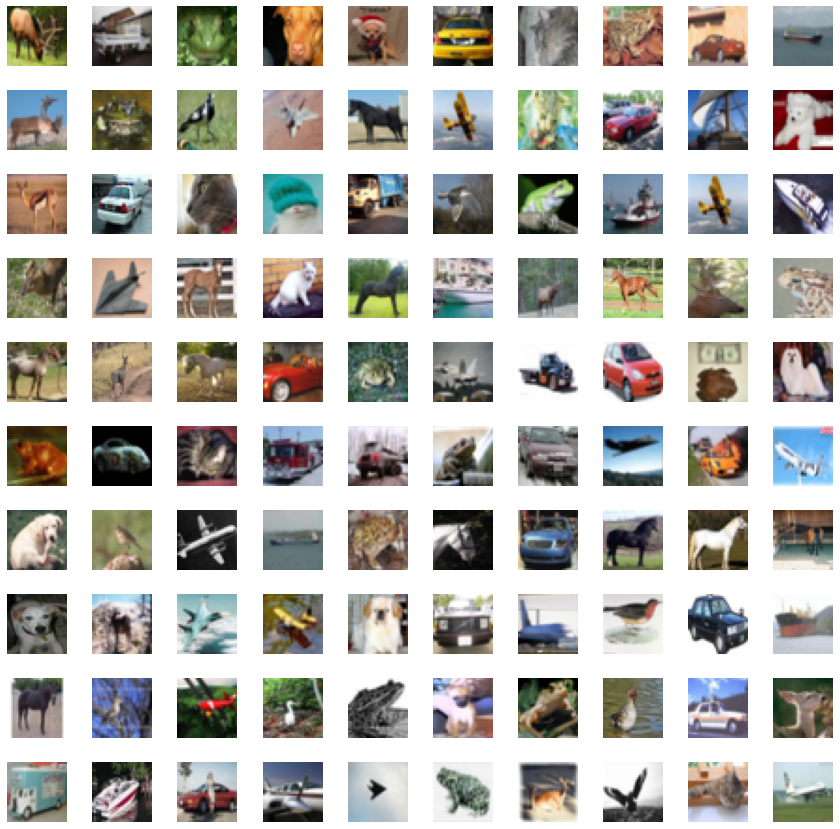

In [36]:
width,height = 10,10

fig,axes = plt.subplots(height,width,figsize=(15,15))
axes = axes.ravel()  # 10,10->[100]
for i in range(0,width*height):
    index = np.random.randint(0,49999)
    axes[i].imshow(X_train[index],cmap="gray")
#     axes[i].set_title(y_train[index],fontsize=10)
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)

In [37]:
X_train = X_train/255
X_test = X_test/255

In [38]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Convolutional Autoencoders

In [39]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
           "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [59]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same",input_shape=(32,32,3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size=(2,2),padding="same"))

autoencoder.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size=(2,2),padding="same"))

autoencoder.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size=(2,2),padding="same"))

# Decoder
autoencoder.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(filters=3,kernel_size=(3,3),activation="sigmoid",padding="same"))

autoencoder.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_23 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 8, 8, 16)        

In [60]:
autoencoder.compile(optimizer="Adam",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

In [61]:
autoencoder.fit(X_train,X_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 167s 106ms/step - loss: 0.5828 - accuracy: 0.6441
Epoch 2/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.5682 - accuracy: 0.7226
Epoch 3/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.5651 - accuracy: 0.7384
Epoch 4/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.5637 - accuracy: 0.7453
Epoch 5/10
1563/1563 [==============================] - 158s 101ms/step - loss: 0.5627 - accuracy: 0.7508
Epoch 6/10
1563/1563 [==============================] - 158s 101ms/step - loss: 0.5621 - accuracy: 0.7537
Epoch 7/10
1563/1563 [==============================] - 159s 101ms/step - loss: 0.5614 - accuracy: 0.7568
Epoch 8/10
1563/1563 [==============================] - 176s 113ms/step - loss: 0.5608 - accuracy: 0.7603
Epoch 9/10
1563/1563 [==============================] - 165s 105ms/step - loss: 0.5606 - accuracy: 0.7600
Epoch 10/10
1563/1563 [=======================

In [62]:
autoencoder.evaluate(X_test,X_test)

313/313 [==============================] - 10s 31ms/step - loss: 0.5598 - accuracy: 0.7517


[0.5597800016403198, 0.7517150640487671]

In [63]:
encoder = Model(inputs=autoencoder.input,outputs=autoencoder.get_layer("average_pooling2d_17").output)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45_input (InputLayer) [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_23 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 8, 8, 32)          0     

In [64]:
encoded_test_images = encoder.predict(X_test)

In [65]:
encoded_test_images.shape

(10000, 4, 4, 16)

In [66]:
decoded_test_images = autoencoder.predict(X_test)

In [67]:
decoded_test_images.shape

(10000, 32, 32, 3)

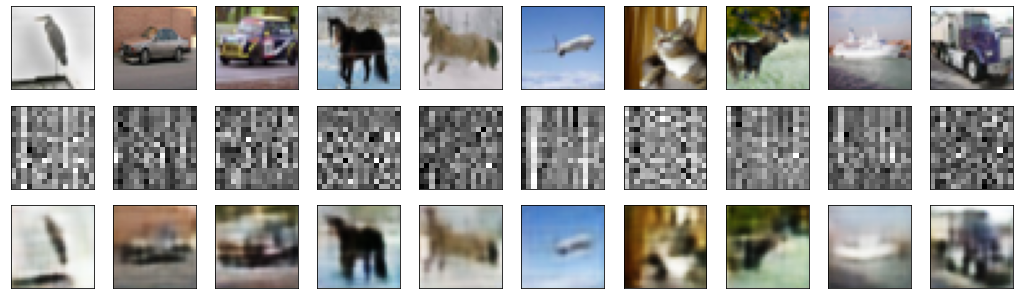

In [72]:
n = 10
test_images = np.random.randint(0,X_test.shape[0]-1,size=n)
plt.figure(figsize=(18,18))
for i,image_index in enumerate(test_images):
    # Original Images
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[image_index],cmap="gray")
    plt.xticks(())
    plt.yticks(())
    
    # Encoded Images
    ax = plt.subplot(10,10,i+1+n)
    plt.imshow(encoded_test_images[image_index].reshape(16,16),cmap="gray")
    plt.xticks(())
    plt.yticks(())
    
    # Decoded Images
    ax = plt.subplot(10,10,i+1+n*2)
    plt.imshow(decoded_test_images[image_index],cmap="gray")
    plt.xticks(())
    plt.yticks(())